In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

Using TensorFlow backend.


In [ ]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv').iloc[:,:].values
mnist

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = mnist[:,0]
x = mnist[:,1:]
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
temp = []
for i in x:
  temp.append(i.reshape(28,28))
temp = np.array(temp)
temp.shape  

(19999, 28, 28)

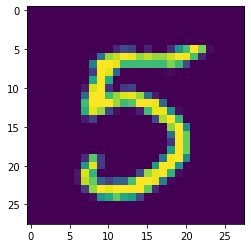

In [ ]:
plt.imshow(temp[0])

In [ ]:
x = temp.reshape(-1,28,28,1)
y = to_categorical(y)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(254, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 254)               32766     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32640     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
history = model.fit(x, y, validation_split=0.2, epochs=20, batch_size=150)

Train on 15999 samples, validate on 4000 samples
Epoch 1/20
15999/15999 [==============================] - 8s 511us/step - loss: 1.8057 - accuracy: 0.8171 - val_loss: 0.2898 - val_accuracy: 0.9170
Epoch 2/20
15999/15999 [==============================] - 8s 477us/step - loss: 0.1895 - accuracy: 0.9462 - val_loss: 0.2029 - val_accuracy: 0.9438
Epoch 3/20
15999/15999 [==============================] - 8s 478us/step - loss: 0.1062 - accuracy: 0.9690 - val_loss: 0.1335 - val_accuracy: 0.9620
Epoch 4/20
15999/15999 [==============================] - 8s 488us/step - loss: 0.0625 - accuracy: 0.9795 - val_loss: 0.1113 - val_accuracy: 0.9655
Epoch 5/20
15999/15999 [==============================] - 8s 471us/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.1184 - val_accuracy: 0.9700
Epoch 6/20
15999/15999 [==============================] - 8s 478us/step - loss: 0.0321 - accuracy: 0.9892 - val_loss: 0.1202 - val_accuracy: 0.9678
Epoch 7/20
15999/15999 [==============================] - 8s 47

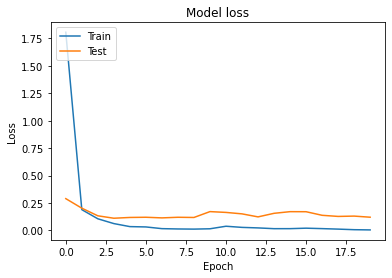

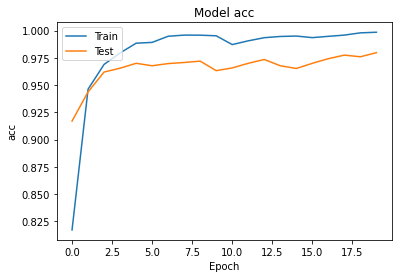

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('val_accuracy_97.h5 ')

In [ ]:
all_img = []
for i in range(1,10):
  img1 = cv2.imread(str(i)+'.jpg',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (28,28)))

In [ ]:
all_img = np.array(all_img)

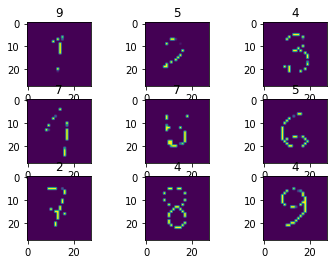

In [ ]:
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,28,28,1)))))